In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import sys
sys.path.append("..") # Adds higher directory to python modules path.

from data_utils import group_medals

df = pd.read_csv("../athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [67]:
# a. hur många länder som är med i datan?
unique_countries = df["NOC"].unique()
amount_of_countries = len(unique_countries)
print(f"Det finns {amount_of_countries} unika länder i datan")

Det finns 230 unika länder i datan


In [68]:
# b. vilka länder är med? (förkortningarna räcker)
print("Följande länder finns med i datan:")
print(unique_countries)

Följande länder finns med i datan:
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VA

In [69]:
# c. vilka sporter är med?
unique_sports = df["Sport"].unique()
print("Följande sporter finns med i datan:")
print(unique_sports)

Följande sporter finns med i datan:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [70]:
# d. vilka medaljtyper finns det?
unique_medal_types = df["Medal"].dropna().unique()
print("Följande medaljtyper finns med i datan:")
print(unique_medal_types)

Följande medaljtyper finns med i datan:
['Gold' 'Bronze' 'Silver']


In [71]:
# e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,
age_mean = df["Age"].mean()
age_median = df["Age"].median()
age_min = df["Age"].min()
age_max = df["Age"].max()
age_std_dev = df["Age"].std()

print("Statistik för åldern:")
print(f"Medelvärde: {age_mean}")
print(f"Median: {age_median}")
print(f"Min: {age_min}")
print(f"Max: {age_max}")
print(f"Standardavvikelse: {age_std_dev}")

Statistik för åldern:
Medelvärde: 25.556898357297374
Median: 24.0
Min: 10.0
Max: 97.0
Standardavvikelse: 6.393560847035813


In [72]:
# f. utforska datan vidare med egna frågor
# (Vilket event har den högsta åldern och när var detta?)
max_age_row = df[df["Age"] == df["Age"].max()]
print(f"Högsta åldern förekom {max_age_row.iloc[0]["Games"]} i eventet {max_age_row.iloc[0]["Event"]}")
# (Vilket event har den lägsta åldern och när var detta?)
min_age_row = df[df["Age"] == df["Age"].min()]
print(f"Lägsta åldern förekom {min_age_row.iloc[0]["Games"]} i eventet {min_age_row.iloc[0]["Event"]}")

Högsta åldern förekom 1928 Summer i eventet Art Competitions Mixed Sculpturing, Statues
Lägsta åldern förekom 1896 Summer i eventet Gymnastics Men's Parallel Bars, Teams


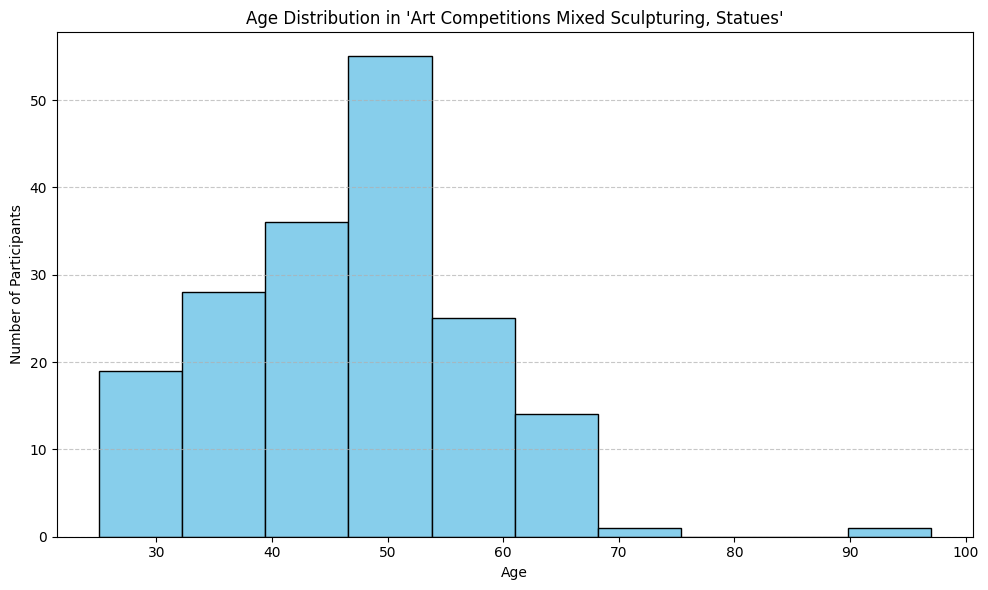

In [73]:
# Åldersfördelning i Art Competitions Mixed Sculpturing, Statues
event_data = df[df["Event"] == "Art Competitions Mixed Sculpturing, Statues"]

plt.figure(figsize=(10, 6))
plt.hist(event_data["Age"].dropna(), bins=10, color="skyblue", edgecolor="black")

plt.title("Age Distribution in 'Art Competitions Mixed Sculpturing, Statues'")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

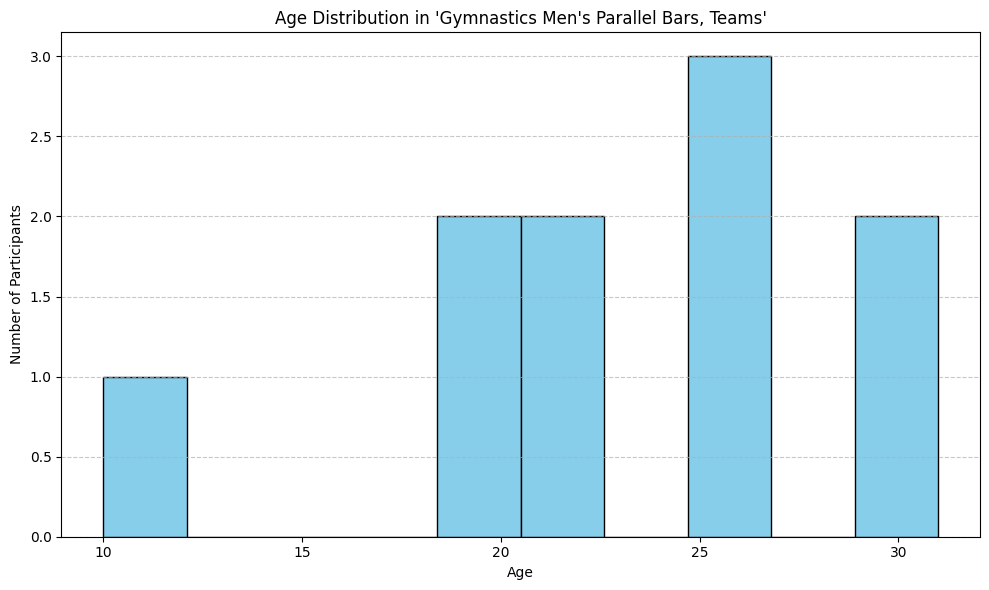

In [74]:
# Åldersfördelning i Gymnastics Men's Parallel Bars, Teams
event_data = df[df["Event"] == "Gymnastics Men's Parallel Bars, Teams"]

plt.figure(figsize=(10, 6))
plt.hist(event_data["Age"].dropna(), bins=10, color="skyblue", edgecolor="black")

plt.title("Age Distribution in 'Gymnastics Men's Parallel Bars, Teams'")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [75]:
# g. diagram över könsfördelningen
gender_counts = df["Sex"].value_counts().reset_index()
gender_counts.columns = ["Sex", "Count"]

fig = px.bar(
    gender_counts,
    x="Sex",
    y="Count",
    title="Gender Distribution",
    labels={"Sex": "Sex", "Count": "Count"},
    color="Sex",
    text="Count"
)

fig.show()

In [76]:
# h. diagram över topp 10 länder som tagit flest medaljer
medal_counts = group_medals(df, "NOC")

medal_counts = medal_counts[medal_counts["Total"] > 0]

medal_counts = medal_counts.sort_values(by="Total", ascending=False)
medal_counts = medal_counts.iloc[:10]

fig = px.bar(medal_counts, x=medal_counts.index, y=medal_counts["Total"], title="Countries with most amount of medals", color=medal_counts.index)

fig.show()

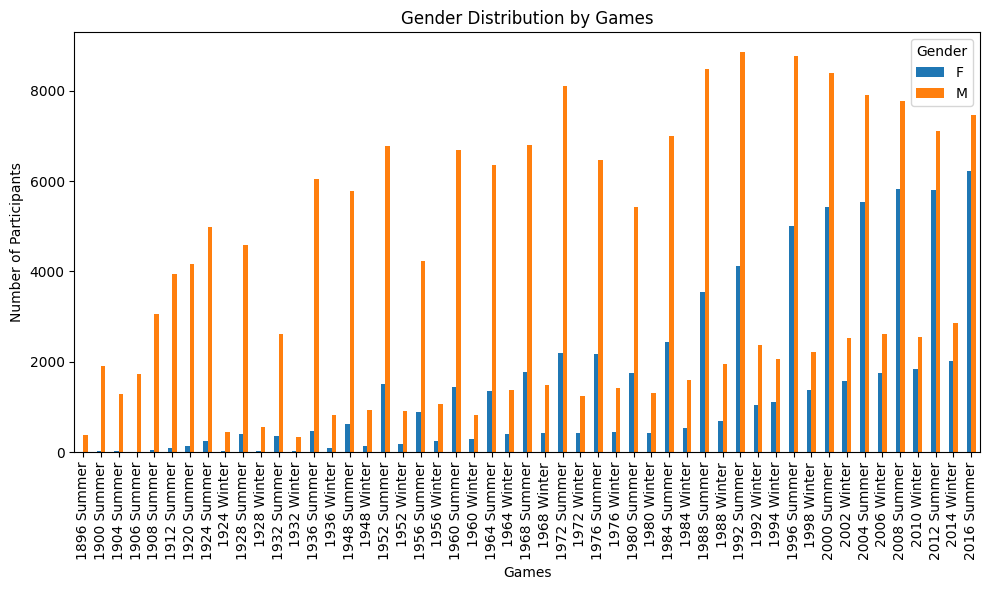

In [77]:
# i. plotta gärna fler saker som är intressant.
# (Hur har könsfördelningen ändrats för varje event?)
gender_distribution = df.groupby("Games")["Sex"].value_counts().unstack(fill_value=0)

gender_distribution.plot(kind="bar", figsize=(10, 6))

plt.title("Gender Distribution by Games")
plt.xlabel("Games")
plt.ylabel("Number of Participants")
plt.legend(title="Gender")
plt.tight_layout()

plt.show()

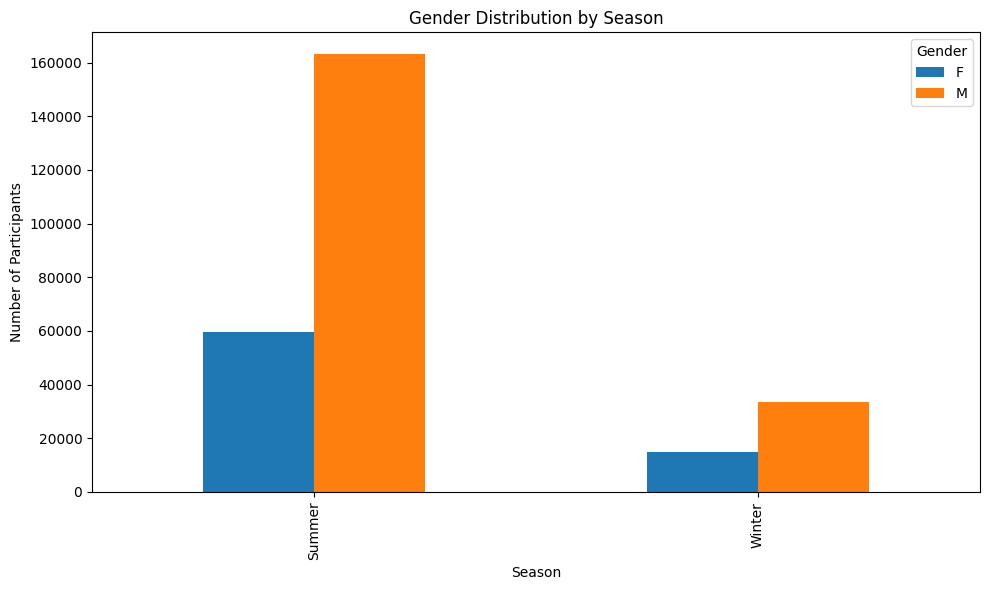

In [78]:
# (Hur har könsfördelningen ändrats för varje event?)
gender_distribution = df.groupby("Season")["Sex"].value_counts().unstack(fill_value=0)

gender_distribution.plot(kind="bar", figsize=(10, 6))

plt.title("Gender Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Number of Participants")
plt.legend(title="Gender")
plt.tight_layout()

plt.show()

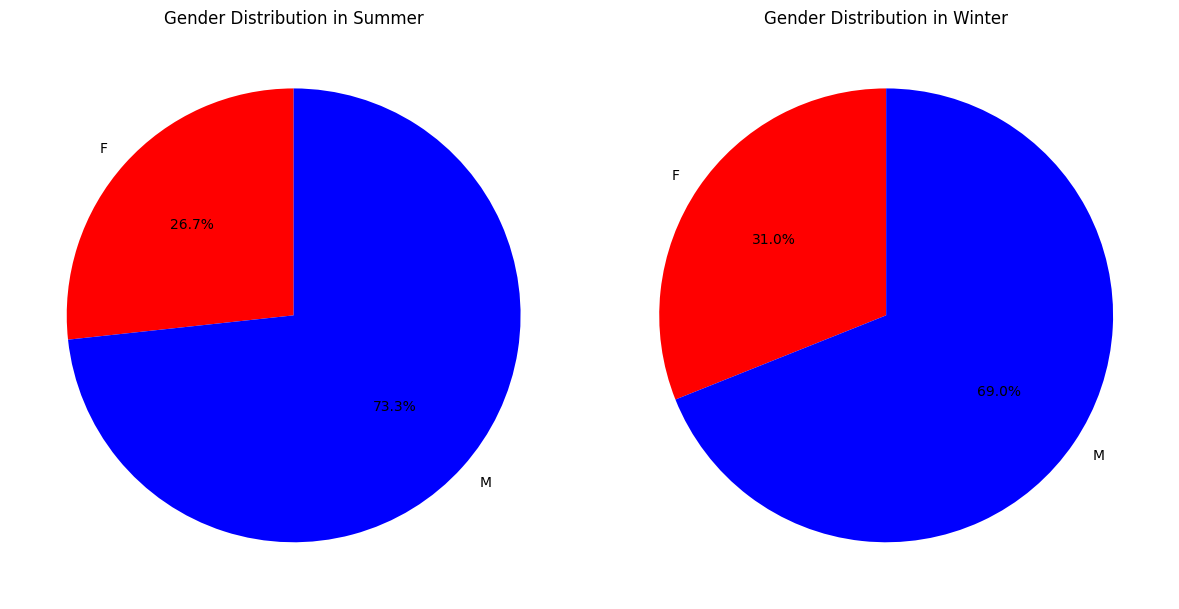

In [79]:
gender_percentage = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (season, percentages) in zip(axes, gender_percentage.iterrows()):
    ax.pie(
        percentages,
        labels=percentages.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["red", "blue"],
    )
    ax.set_title(f"Gender Distribution in {season}")

plt.tight_layout()
plt.show()